# Homework 4

## FINM 37400 - 2025

### UChicago Financial Mathematics

* Mark Hendricks
* hendricks@uchicago.edu

***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1 HBS Case: The Information Content of the Yield Curve

## 1.1

The Term Spread
* What is the term spread? 
* What is the preferred measure of the term spread in the case?
* What evidence is cited for the term spread's power in predicting recessions?
* Which is more important, the level of the term spread, its month-over-month change, or the level of short rates?

Using the file `yields.xlsx`, calculate the term spread at the end of the sample.
* What does this term spread suggest about economic growth, according to the evidence of Estrella?

## 1.2

Term premia
* What is the term premium? Why is it impossible to get a direct measure of it?
* Explain equations (1) and (2). Why does Sacks think this concept of the term spread complicates the relationship found by Estrella?

## 1.3

Though this case touches on monetary policy, that is not our focus. Rather, our focus is the degree to which the current shape of the yield curve is predictive of future short-term interest rates.

Suppose the term premium is zero. 
* What does a downward-sloping yield curve predict about future short-term rates? 
* In this case, is it risky to hold long-term bonds or short-term bonds? Is this risk compensated?

Suppose the term premium increases 5 percentage points.
* What would change about your previous answer?

***

# 2 Forward Curve from the Spot Curve

Use the data in `'../data/treasury_quotes_2024-10-31.xlsx`, focusing on the selected data found in the sheet `selected quotes`.

### 2.1 
Bootstrap the discount factor. 

Plot the answer in terms of discount factors and discount rates.

Though the time-to-maturity (ttm) is not spaced exactly at 6 months, for the purposes of this problem, you are welcome to approximate that they are spaced at exact 6-month intervals.


### 2.2
Calculate and plot the forward discount factors from $T$ to $T+0.5$, ranging $T$ from 0.5 through 6.5.


### 2.3
Use the forward discount factors to calculate the `semiannually` compounded forward **rates**.

Plot the curve.

#### 2.4

Specifically report the forward-rate values from 

* $T_1=0.5$ to $T_2=1$.
* $T_1=3.5$ to $T_2=4$.

***

# 3. Forward Discount Factors, Forward Rates, and Evolving Spot Rates

Use the data set `famabliss_strips_2024-12-31.xlsx`.

It gives prices on **zero coupon bonds** with maturities of 1 through 5 years.
* These are prices per \$1 face value on bonds that only pay principal.
* Such bonds can be created from treasuries by stripping out their coupons.
* In essence, you can consider these prices as the discount factors $Z$, for maturity intervals 1 through 5 years.

In this problem, we focus on six dates: the month of `December` in `2020` through `2024`.

In [5]:
prices = pd.read_excel("../data/famabliss_strips_2024-12-31.xlsx", sheet_name='prices')  
prices['date'] = pd.to_datetime(prices['date'])
prices.head()

,date,1,2,3,4,5
0,1952-06-30,0.981778,0.962531,0.942467,0.926341,0.904183
1,1952-07-31,0.980948,0.960315,0.939312,0.923089,0.898516
2,1952-08-29,0.980578,0.959750,0.937819,0.921458,0.895717
3,1952-09-30,0.980312,0.959098,0.937551,0.920961,0.891676
4,1952-10-31,0.981108,0.959745,0.937583,0.919290,0.897248


### 3.1

For each of the dates, (`Dec 2020`, ..., `Dec 2024`), calculate the forward discount factor, $F(t,T_1,T_2)$, where $T_2 = T_1 + 1$ for $1\le T_1\le 4$.

Make a plot of the curve $F$ at each of these six dates.

In [24]:
def filter_month_data(df, years, month=12) :
    mask = df['date'].dt.year.isin(years) & (df['date'].dt.month == month)
    df_filtered = df.loc[mask].copy()    
    df_filtered.sort_values('date', inplace=True)
    return df_filtered

years = [2020, 2021, 2022, 2023, 2024]
df = filter_month_data(prices, years, 12).set_index('date')
df

,1,2,3,4,5
date,,,,,
2020-12-31,0.998959,0.997520,0.995299,0.989455,0.981537
2021-12-31,0.996173,0.985500,0.971251,0.954872,0.938668
2022-12-30,0.954636,0.916229,0.883347,0.851046,0.820298
2023-12-29,0.953787,0.919644,0.888523,0.856672,0.826740
2024-12-31,0.959864,0.919585,0.880687,0.841768,0.804591


,2,3,4,5
date,,,,
2020-12-31,0.998560,0.997773,0.994129,0.991997
2021-12-31,0.989286,0.985541,0.983136,0.983031
2022-12-30,0.959768,0.964111,0.963434,0.963870
2023-12-29,0.964203,0.966159,0.964153,0.965059
2024-12-31,0.958037,0.957701,0.955808,0.955836


<Axes: title={'center': 'Forward Discount Factor Curves (Dec 2020 - Dec 2024)'}, xlabel='Maturity T1 (years)', ylabel='Forward Discount Factor F(t, T1, T1+1)'>

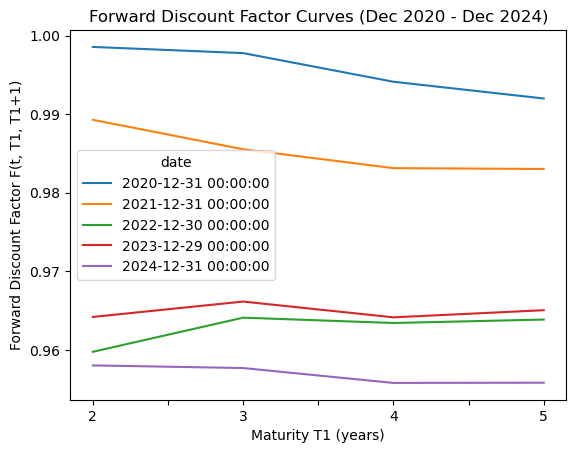

In [40]:
def calculate_forward_discount_factors(df):
    F = df[list(df.columns)[1:]] / df[(df.columns)[:-1]].values
    return F 
F = calculate_forward_discount_factors(df)
display(F)
F.T.plot(xlabel="Maturity T1 (years)", 
         ylabel="Forward Discount Factor F(t, T1, T1+1)", 
         title="Forward Discount Factor Curves (Dec 2020 - Dec 2024)")

Use $F$ above to calculate the continuously compounded forward rates, $f$, on each date.

Make a plot of the curve, $f$, at each of these dates.

### 3.2
Use F above to calculate the continuously compounded forward rates, f , on each date.
Make a plot of the curve, f, at each of these dates.

In [41]:
def calclate_spot_rate(df):
    spot = -np.log(df)/df.columns
    return spot
spot = calclate_spot_rate(df)
spot

,1,2,3,4,5
date,,,,,
2020-12-31,0.001042,0.001242,0.001571,0.00265,0.003727
2021-12-31,0.003834,0.007303,0.009724,0.011545,0.012659
2022-12-30,0.046425,0.043744,0.041346,0.040322,0.039618
2023-12-29,0.047314,0.041884,0.039398,0.038675,0.038053
2024-12-31,0.040964,0.041916,0.042351,0.043063,0.043484


,1,2,3,4,5
date,,,,,
2020-12-31,0.001042,0.001441,0.002229,0.005889,0.008035
2021-12-31,0.003834,0.010772,0.014564,0.017008,0.017115
2022-12-30,0.046425,0.041064,0.036548,0.037252,0.036799
2023-12-29,0.047314,0.036454,0.034427,0.036505,0.035566
2024-12-31,0.040964,0.042869,0.043220,0.045199,0.045169


<Axes: title={'center': 'Continuously Compounded Forward Rate Curves (Dec 2020 - Dec 2024)'}, xlabel='Maturity T1 (years)', ylabel='Continuously Compounded Forward Rate'>

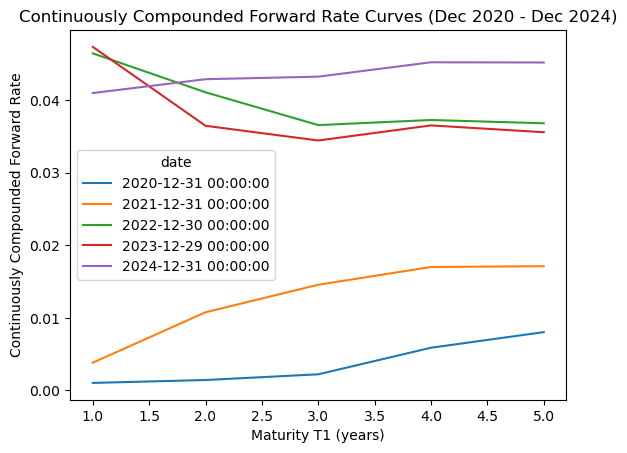

In [42]:
def calculate_continuous_forward_rates(df, spot, F):
    fwd_rates = -np.log(F)
    fwd_rates.insert(0,1,spot[1])
    return fwd_rates
f = calculate_continuous_forward_rates(df, spot, F)
display(f)
f.T.plot(xlabel="Maturity T1 (years)", 
         ylabel="Continuously Compounded Forward Rate", 
         title="Continuously Compounded Forward Rate Curves (Dec 2020 - Dec 2024)")

### 3.3

Calculate the continuously compounded spot rates, $r$, at these dates.

Plot both the forward curve and the spot curve on the date of `Dec 2020`.

Recall that $f(t,t,t+1) = r(t,t+1)$.

<Axes: title={'center': 'Continuously Compounded Forward Rate Curves (Dec 2020 - Dec 2024)'}, xlabel='Maturity T1 (years)', ylabel='Continuously Compounded  Spot Rate'>

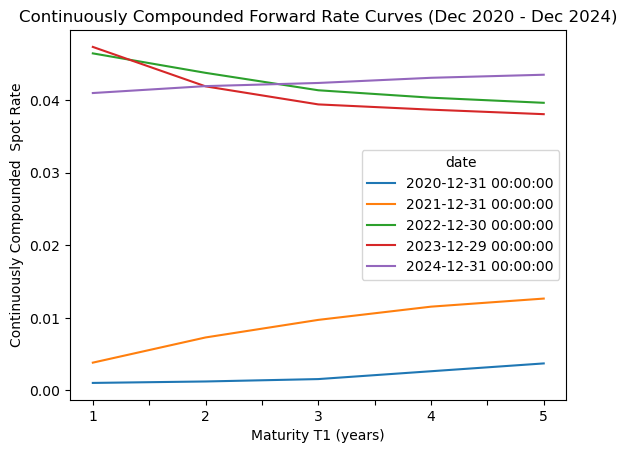

In [45]:
spot.T.plot(xlabel="Maturity T1 (years)", 
            ylabel="Continuously Compounded  Spot Rate", 
            title="Continuously Compounded Forward Rate Curves (Dec 2020 - Dec 2024)")

Continuously Compounded Forward Rate - December 2020


,1,2,3,4,5
date,,,,,
2020-12-31,0.001042,0.001441,0.002229,0.005889,0.008035


Continuously Compounded Spot Rate - December 2020


,1,2,3,4,5
date,,,,,
2020-12-31,0.001042,0.001242,0.001571,0.00265,0.003727


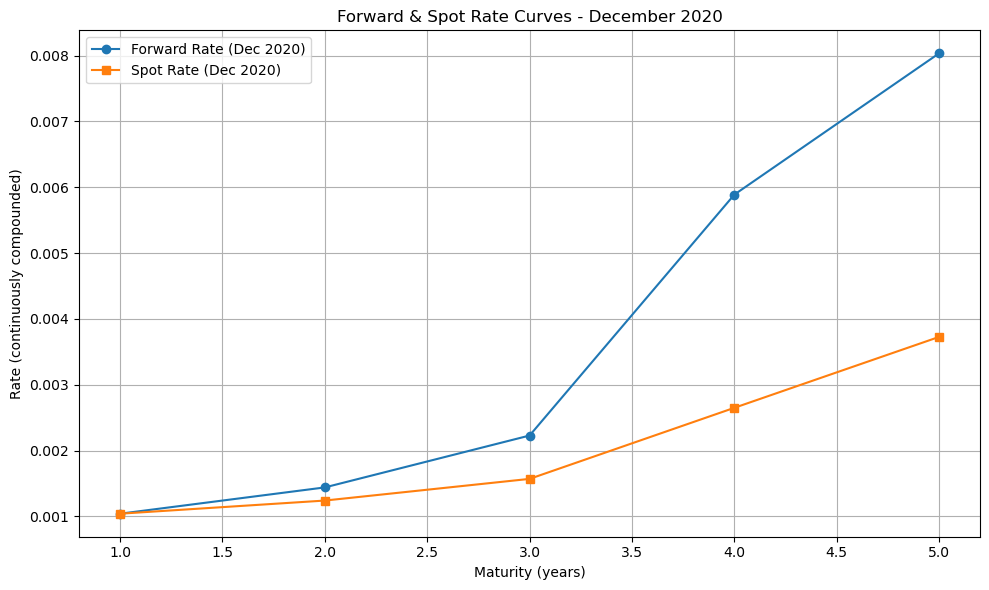

In [49]:
print("Continuously Compounded Forward Rate - December 2020")
display(f.loc['2020'])
print("Continuously Compounded Spot Rate - December 2020")
display(spot.loc['2020'])

plt.figure(figsize=(10, 6))
maturities = list(spot.columns)

plt.plot(maturities, f.loc['2020-12-31'], marker='o', label='Forward Rate (Dec 2020)')
plt.plot(maturities, spot.loc['2020-12-31'], marker='s', label='Spot Rate (Dec 2020)')

plt.xlabel("Maturity (years)")
plt.ylabel("Rate (continuously compounded)")
plt.title("Forward & Spot Rate Curves - December 2020")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()

### 3.4

Plot the forward curve on `Dec 2020` against the time-series evolution of $r(t,t+1)$ for dates $t$ between `Dec 2020` and `Dec 2024`.

How does the evolution of one-year rates between `2020-2024` compare to the forward rates of `2020`?

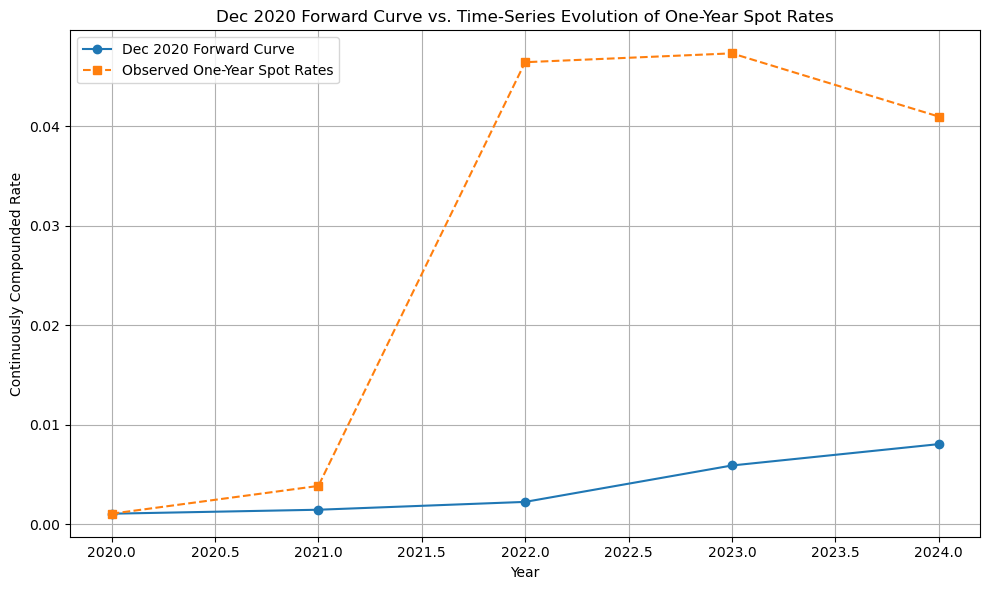

In [53]:
DATE = '2020-12-31'
temp = f.loc[DATE].T.copy()
temp.index = temp.index.astype(int)  
temp.name = 'Forward Curve'
temp = temp.to_frame()  

spot_over_time = spot[1].copy()
spot_over_time.index = spot_over_time.index.year
years = [2020, 2021, 2022, 2023, 2024]
temp.index = years
temp['Spot over Time'] = spot_over_time.loc[years].values

plt.figure(figsize=(10, 6))
plt.plot(temp.index, temp['Forward Curve'], marker='o', linestyle='-', label='Dec 2020 Forward Curve')
plt.plot(temp.index, temp['Spot over Time'], marker='s', linestyle='--', label='Observed One-Year Spot Rates')
plt.xlabel("Year")
plt.ylabel("Continuously Compounded Rate")
plt.title("Dec 2020 Forward Curve vs. Time-Series Evolution of One-Year Spot Rates")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()

Clearly in this particular scenario, the forward rates were way conservative t

***